## Hypothesis Testing

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

<font color = 'red'>**Has the network latency gone up since we switched internet service providers?**<font color = 'black'>

null hypothesis: 
There is no significant difference in network latency since we switched internet service providers.
    

alternative hypothesis: 
There is a difference in network latency since we switched internet service providers.   -- "The new ISP has higher latency"
    
    
True Positive: 
The network latency has increased and we switched providers
    
    
True Negative: 
The network latency has not increased and we switch providers
    

Type I Error:
There is no latency and we switch providers. 
    

Type II: 
There is latency but we didn't switch providers. 



<font color = 'red'>**Is the website redesign any good?**<font color = 'black'>
    
Need more information - what are you measuring here -- what makes it better?  More time, more clicks, less need for help?
    
Null: 
There is no difference in activity between the old and new websites.

    
Alternative: 
Website traffic has changed since the website was redesigned. 

    
True Positive: 
The network traffic has increased since the website redesign
    
    
True Negative: 
The network traffic has not increased since the website redesign
    

Type I Error:
There is no latency and we switch providers. 
    

Type II: 
There is latency but we didn't switch providers. 




<font color = 'red'>**Is our television ad driving more sales?**

Null: 
There is no difference in sales since we began advertising on television. 
    
    
Alternative: 
There has been a change in sales since we began advertising on television. 

    
    
    

### T-Test Exercises

In [7]:
from pydataset import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

**<font color = 'red'>Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. <font color = 'black'>**
* A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
* A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
* Use a .05 level of significance.



In [14]:
#we are comparing -- average time (numberic continuous values) to sell for two different groups (categories)

# two sample, two tailed

null_hypothesis = "There is no difference in the average time it takes to sell homes for the two offices."
alt_hypothesis = "The average time to sell a home for the two offices is different."

mean1 = 90
std1 = 15
nobs1 = 40

mean2 = 100
std2 = 20
nobs2 = 50


confidence_level = 0.95
a = 0.5

t, p = stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2)
t, p


(-2.6252287036468456, 0.01020985244923939)

In [16]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis.")
else: 
    print("We fail to reject the null hypothesis. This means that we don't have sufficient evident to support the claim.")

We fail to reject the null hypothesis. This means that we don't have sufficient evident to support the claim.


Load the mpg dataset and use it to answer the following questions:

* Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

* Are compact cars more fuel-efficient than the average car?

* Do manual cars get better gas mileage than automatic cars?

In [36]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


* <font color = 'red'>Is there a difference in fuel-efficiency in cars from 2008 vs 1999?<font color = 'black'>

In [37]:
null_hypothesis = "The fuel-efficiency of cars from 2008 and cars for 1999 is the same."
alternative_hypothesis = "There is a difference in the fuel-efficiency of cars from 2008 and cars for 1999."
confidence_level = .95
a = 1 - confidence_level


mpg["average_mpg"] = (mpg['cty'] + mpg['hwy'])/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


<AxesSubplot:>

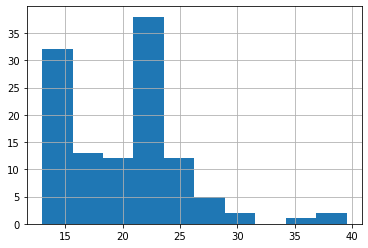

In [38]:
Twenty_o_eight = mpg[mpg.year == 2008]
Ninety_nine = mpg[mpg.year == 1999]

Ninety_nine.average_mpg.hist()

<AxesSubplot:>

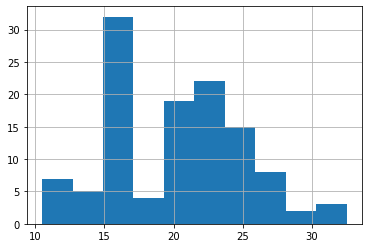

In [39]:
Twenty_o_eight.average_mpg.hist()

In [40]:
t, p = stats.ttest_ind(Ninety_nine.average_mpg, Twenty_o_eight.average_mpg)
t,p

(0.21960177245940962, 0.8263744040323578)

In [41]:
if p < a:
    print("We reject the null hypothesis that they are the same")
    print("We move forward with the alternative hypothesis.")
else: 
    print("We fail to reject the null hypothesis. We don't have sufficient evidence to support the claim that they are different.")

We fail to reject the null hypothesis. We don't have sufficient evidence to support the claim that they are different.


* <font color = 'red'>Are compact cars more fuel-efficient than the average car?<font color = 'black'>

In [53]:
compact = mpg[mpg['class'] == 'compact']
compact.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


<AxesSubplot:>

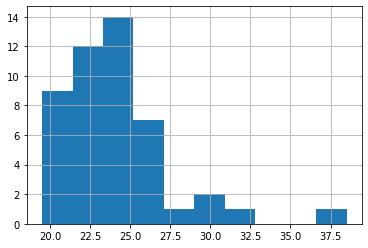

In [51]:
compact.average_mpg.hist()

<AxesSubplot:>

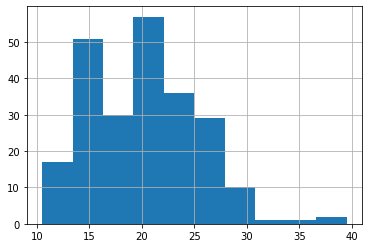

In [52]:
mpg.average_mpg.hist()

In [ ]:
null_hypothesis = "The fuel efficiency of subcompacts is equal to the of the average car."
alternative_hypothesis =     "Subcompacts have better fuel efficience than the average car"

stats.ttest_1samp(fe_compact, )